# Model builder
## Life Cycle Assessment of ``{Operational Energy Moerschberg for 1 year: 1}``
###[CONTEXT]
The model relies on datapackages to ensure replicability of the calculation.


In [1]:
import bw2data as bd
import bw2calc as bc
import bw2io as bi
import bw_processing as bwp
import numpy as np
from pathlib import Path
import pandas as pd
bd.projects.set_current('moeschpond1')
# bd.projects.migrate_project_25() ## This has to be done only once when importing

In [2]:
bd.databases

Databases dictionary with 13 object(s):
	EI 3.8 cutoff image SSP2-Base 2050
	EI 3.8 cutoff image SSP2-RCP19 2050
	EI 3.8 cutoff image SSP2-RCP26 2050
	EI 3.8 cutoff remind SSP2-Base 2050
	EI 3.8 cutoff remind SSP2-PkBudg1150 2050
	EI 3.8 cutoff remind SSP2-PkBudg500 2050
	biosphere3
	ei 3.8 cutoff
	energy_moeschberg
	sib_shan
	solar_huimin
	super_db_2022-10-26
	super_db_2022-10-27

In [86]:
main_act = bd.get_activity(database = "energy_moeschberg",
                name = "energy demand, operational, Hotel Moeschberg")
heat_supply = bd.get_activity(database = "energy_moeschberg",
                name = "heat supply, Hotel Moeschberg, 2021")

In [87]:
db = bd.Database("ei 3.8 cutoff") 
heat_boiler = bd.get_activity(database = "ei 3.8 cutoff",
    code = "de9a93ee333015bc054056b0d03797e2", 
    location= "CH",
                name = "heat production, biomethane, at boiler condensing modulating <100kW",
               product="heat, central or small-scale, biomethane")

heat_meth = bd.get_activity(database = "ei 3.8 cutoff",
    code = "0b1ada93ccd35542b576b6434b5e7f92", 
    location= "CH",
                name = "heat production, air-water heat pump 10kW",
               product="heat, air-water heat pump 10kW")

In [98]:
# heat_supply.new_edge(input=heat_boiler, amount=0, type="technosphere").save()
heat_supply.new_edge(input=heat_meth, amount=0, type="technosphere").save()

In [99]:
list(heat_supply.technosphere())

[Exchange: 0.004668 megajoule 'operation, solar collector system, Cu flat plate collector, one-family house, for hot water' (megajoule, CH, None) to 'heat supply, Hotel Moeschberg, 2021' (megajoule, CH, None)>,
 Exchange: 0.9953 megajoule 'heat production, wood pellet, at furnace 25kW, state-of-the-art 2014' (megajoule, CH, None) to 'heat supply, Hotel Moeschberg, 2021' (megajoule, CH, None)>,
 Exchange: 0 megajoule 'heat production, biomethane, at boiler condensing modulating <100kW' (megajoule, CH, None) to 'heat supply, Hotel Moeschberg, 2021' (megajoule, CH, None)>,
 Exchange: 0 megajoule 'heat production, air-water heat pump 10kW' (megajoule, CH, None) to 'heat supply, Hotel Moeschberg, 2021' (megajoule, CH, None)>]

In [3]:
# imp = bi.ExcelImporter('./data/inputs/SIB inventory_v2_working.xlsx')
# imp.apply_strategies()
# imp.match_database("ei 3.8 cutoff", fields=('name','unit','location', 'reference product'))
# imp.match_database(fields=('name', 'unit', 'location'))
# imp.statistics()
# imp.write_excel(only_unlinked=True)

# imp.write_database()
# imp = bi.ExcelImporter('./data/inputs/lci_solarpv_huimin_masterthesis_combined.xlsx')
# imp.apply_strategies()
# imp.match_database("ei 3.8 cutoff", fields=('name','unit','location'))
# imp.match_database(fields=('name', 'unit', 'location'))
# imp.statistics()
# imp.write_excel(only_unlinked=True)
# imp.write_database()

# foreground_importer = bi.ExcelImporter("./data/inputs/lci_moeschberg.xlsx")
# foreground_importer.apply_strategies()
# foreground_importer.match_database("biosphere3", fields=("name", "unit", "categories"))
# foreground_importer.match_database("ei 3.8 cutoff", fields=("name", "unit", "location"))
# foreground_importer.statistics()
# foreground_importer.write_database()


Extracted 1 worksheets in 0.02 seconds
Applying strategy: csv_restore_tuples
Applying strategy: csv_restore_booleans
Applying strategy: csv_numerize
Applying strategy: csv_drop_unknown
Applying strategy: csv_add_missing_exchanges_section
Applying strategy: normalize_units
Applying strategy: normalize_biosphere_categories
Applying strategy: normalize_biosphere_names
Applying strategy: strip_biosphere_exc_locations
Applying strategy: set_code_by_activity_hash
Applying strategy: link_iterable_by_fields
Applying strategy: assign_only_product_as_production
Applying strategy: link_technosphere_by_activity_hash
Applying strategy: drop_falsey_uncertainty_fields_but_keep_zeros
Applying strategy: convert_uncertainty_types_to_integers
Applying strategy: convert_activity_parameters_to_list
Applied 16 strategies in 7.09 seconds
Applying strategy: link_iterable_by_fields
Applying strategy: link_iterable_by_fields
14 datasets
140 exchanges
0 unlinked exchanges
  
Wrote matching file to:
/home/jupyter

In [100]:
fu = {bd.get_activity(database="energy_moeschberg", name = "energy demand, operational, Hotel Moeschberg"):1}
fu, objects, remapping_dicts = bd.prepare_lca_inputs(fu, method=('IPCC 2013', 'climate change', 'GWP 100a'))
data_obj_energy = objects[2]
data, _ = data_obj_energy.get_resource("energy_moeschberg_technosphere_matrix.data")
indices, _ = data_obj_energy.get_resource("energy_moeschberg_technosphere_matrix.indices")
flip, _ = data_obj_energy.get_resource("energy_moeschberg_technosphere_matrix.flip")
unique_indices = set([a for b in indices for a in b])

df = pd.DataFrame(columns=['id','name','location','reference product'],index=np.arange(len(unique_indices)))
n=0
for i in unique_indices: 
    df['id'][n]=(i)
    df['name'][n]=(bd.get_activity(i)['name'])
    df['location'][n]=(bd.get_activity(i)['location'])
    df['reference product'][n]=(bd.get_activity(i)['reference product'])
    n += 1
df

,id,name,location,reference product
0,6599,"electricity production, hydro, run-of-river",CH,"electricity, high voltage"
1,9036,"heat production, air-water heat pump 10kW",CH,"heat, air-water heat pump 10kW"
2,8302,"operation, solar collector system, Cu flat pla...",CH,"heat, central or small-scale, other than natur..."
3,10319,"electricity production, wind, 1-3MW turbine, o...",CH,"electricity, high voltage"
4,18352,"electricity production, photovoltaic, 3kWp sla...",CH,"electricity, low voltage"
5,20079,"heat and power co-generation, wood chips, 6667...",CH,"electricity, high voltage"
6,21426,"heat production, biomethane, at boiler condens...",CH,"heat, central or small-scale, biomethane"
7,23758,"heat production, wood pellet, at furnace 25kW,...",CH,"heat, central or small-scale, other than natur..."
8,213978,"electricity supply, Hotel Moeschberg, 2021",CH,"electricity, low voltage"
9,213979,"electricity supply, Energie Grosshoechstetten ...",CH,"electricity, low voltage"


In [101]:
id_all = []
sce_names_dict={"id_ei38":"ei 3.8 cutoff",
"id_pre_base":"EI 3.8 cutoff image SSP2-Base 2050",
 "id_pre_19":"EI 3.8 cutoff image SSP2-RCP19 2050",
 "id_pre_26":"EI 3.8 cutoff image SSP2-RCP26 2050",
"id_re_base":"EI 3.8 cutoff remind SSP2-Base 2050",
"id_re_1150":"EI 3.8 cutoff remind SSP2-PkBudg1150 2050",
"id_re_1150":"EI 3.8 cutoff remind SSP2-PkBudg500 2050"
}
for idx, row in df.iterrows():
    act_name = row["name"]
    act_location = row["location"]
    act_ref = row["reference product"]
    row_for_df = {"name":row["name"]}
    
    for name_short, name_long in sce_names_dict.items():
        try:
            act_bg_id = bd.get_activity(database = name_long,name=act_name,location=act_location, product = act_ref).id
        except:
            act_bg_id =row["id"]
        row_for_df[name_short] = act_bg_id

        
    id_all.append(row_for_df)
scenarios_ids=pd.DataFrame(id_all)    
scenarios_ids = scenarios_ids.set_index("id_ei38", drop=False)
scenarios_ids

,name,id_ei38,id_pre_base,id_pre_19,id_pre_26,id_re_base,id_re_1150
id_ei38,,,,,,,
6599,"electricity production, hydro, run-of-river",6599,92881,140945,116913,164977,209765
9036,"heat production, air-water heat pump 10kW",9036,75509,123573,99541,147605,192393
8302,"operation, solar collector system, Cu flat pla...",8302,89605,137669,113637,161701,206489
10319,"electricity production, wind, 1-3MW turbine, o...",10319,91387,139451,115419,163483,208271
18352,"electricity production, photovoltaic, 3kWp sla...",18352,92843,140907,116875,164939,209727
20079,"heat and power co-generation, wood chips, 6667...",20079,89007,137071,113039,161103,205891
21426,"heat production, biomethane, at boiler condens...",21426,91631,139695,115663,163727,208515
23758,"heat production, wood pellet, at furnace 25kW,...",23758,87162,135226,111194,159258,204046
213978,"electricity supply, Hotel Moeschberg, 2021",213978,213978,213978,213978,213978,213978


In [102]:
aa = {}
def modify_w_arrays(data_object, new_arrays, new_indices_dict):
    n = 1
    for k,v in new_arrays.items():
        n = len(v)        

    data, _ = data_object.get_resource(f"{data_object.metadata['name']}_technosphere_matrix.data")
    indices, _ = data_object.get_resource(f"{data_object.metadata['name']}_technosphere_matrix.indices")
    flip, _ = data_object.get_resource(f"{data_object.metadata['name']}_technosphere_matrix.flip")
    
    
    dp_dict = dict(
        zip(indices.astype("object"),[[tup[0], tup[1]] for tup in zip(data,flip)])
                        )
    
    aa = dp_dict
    for key, value in new_arrays.items():
        dp_dict[key][0] = value
    
    new_foreground = bwp.create_datapackage(
    fs = bwp.generic_zipfile_filesystem(dirpath=Path("./data/inputs"), filename=f"{data_object.metadata['name']}.zip", write=True),
    # combinatorial=True,
    sequential=True,
    )

    for row_col, data_flip in dp_dict.items():
        if not isinstance(data_flip[0], np.ndarray):
            new_array = np.full((n,), fill_value = data_flip[0])
            dp_dict[row_col][0] = new_array
            
    new_data = np.array([val[0] for val in dp_dict.items()])
    
    new_indices=[]
    for row, col in indices:
        new_indices.append((new_indices_dict[row], col))
               
        
    new_foreground.add_persistent_array(
    matrix="technosphere_matrix",
    data_array=new_data,
    indices_array=np.array(new_indices, dtype=bwp.INDICES_DTYPE),  
    flip_array=flip,
    name=data_object.metadata['name'],
)

    # return dp_dict
    return new_foreground

In [103]:
def matrix_raw(object_dp):
    data, _ = object_dp.get_resource("energy_moeschberg_technosphere_matrix.data")
    indices, _ = object_dp.get_resource("energy_moeschberg_technosphere_matrix.indices")
    flip, _ = object_dp.get_resource("energy_moeschberg_technosphere_matrix.flip")
    unique_indices = set([a for b in indices for a in b])
    mapping_act=dict.fromkeys(int(i) for i in unique_indices) #json accepts only int not int32
    for i in unique_indices:
        mapping_act[i]=bd.get_activity(i)['name']
    rows = [tup[0] for tup in indices]
    cols = [tup[1] for tup in indices]

    import pandas as pd
    matrix_raw = pd.DataFrame({"row":rows, 
                               "col":cols, 
                               "from":[mapping_act[idx] for idx in rows], 
                               "to":[mapping_act[idx] for idx in cols],
                               "data":data
                              })
    matrix = matrix_raw.pivot(index='row',columns='col', values='data').fillna(0)
    return matrix_raw
dm  = matrix_raw(objects[2])
dm.to_csv("./data/outputs/flows_fg.csv")

In [105]:
# from utils import modify_w_arrays

fu = {bd.get_activity(database="energy_moeschberg", name = "energy demand, operational, Hotel Moeschberg"):1}
fu, objects, remapping_dicts = bd.prepare_lca_inputs(fu, method=('IPCC 2013', 'climate change', 'GWP 100a'))

results = []
scenarios_fg = 4
for col in scenarios_ids.iteritems():
    scenario_name = col[0]
    if "name" not in scenario_name: 
        print("   ")
        print("##############")
        print("SCENARIO CALCULATION: ", scenario_name)
        print("##############")
        new_ind_dict= {}
        for idx, row in scenarios_ids.iterrows():
            original_id = idx
            new_id = row[scenario_name]
            new_ind_dict[original_id]=new_id
            
            new_arrays = {
                        (21426, 213981): [0, 0, 0.9953, 0], #PV becomes the unique elec source
                        (9036, 213981): [0,0,0,0.9953], 
                        (18352, 213978): [0.4406, 1,1,0.4406],
                        (23758, 213981): [0.9953,0.9953, 0,0],
                        (213979, 213978): [0.5594, 0,0,0.5594],
                        
            }
        new_foreground = modify_w_arrays(objects[2], new_arrays, new_ind_dict)
        db=bd.Database(sce_names_dict[scenario_name])
        db_dp = db.datapackage()
        
        
        lca_b = bc.LCA(
        demand=fu,
        data_objs=objects + [db_dp] + [new_foreground],
        use_distributions=False,
        use_arrays=True,
        )
        lca_b.lci()
        lca_b.lcia()
        lca_b.keep_first_iteration()
        iterations = scenarios_fg
        
        counter= 0
        for idx, _ in zip(range(iterations), lca_b):
            scenario_results = {}
            scenario_results["bg"]=scenario_name
            scenario_results["sc_number"]=counter
            scenario_results["score"]=lca_b.score               
            results.append(scenario_results)
            counter+=1
        
        scores_b = [lca_b.score for _ in zip(range(iterations), lca_b)]
        print("RESULTS", scores_b)
results_df = pd.DataFrame(results)
results_df

/tmp/ipykernel_773295/248825968.py:8: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col in scenarios_ids.iteritems():


   
##############
SCENARIO CALCULATION:  id_ei38
##############
RESULTS [0.028950539785263223, 0.3502735248231706, 0.028950539785263223, 0.3502735248231706]
   
##############
SCENARIO CALCULATION:  id_pre_base
##############
RESULTS [0.033521207352077115, 0.39163943272618784, 0.033521207352077115, 0.39163943272618784]
   
##############
SCENARIO CALCULATION:  id_pre_19
##############
RESULTS [0.024886782501803473, 0.28964942023213996, 0.024886782501803473, 0.28964942023213996]
   
##############
SCENARIO CALCULATION:  id_pre_26
##############
RESULTS [0.026522745105418646, 0.3081957425075573, 0.026522745105418646, 0.3081957425075573]
   
##############
SCENARIO CALCULATION:  id_re_base
##############
RESULTS [0.01611608599179204, 0.19958916253785017, 0.01611608599179204, 0.19958916253785017]
   
##############
SCENARIO CALCULATION:  id_re_1150
##############
RESULTS [0.014175143220422112, 0.17439150667631956, 0.014175143220422112, 0.17439150667631956]


,bg,sc_number,score
0,id_ei38,0,0.028951
1,id_ei38,1,0.350274
2,id_ei38,2,0.028951
3,id_ei38,3,0.350274
4,id_pre_base,0,0.033521
5,id_pre_base,1,0.391639
6,id_pre_base,2,0.033521
7,id_pre_base,3,0.391639
8,id_pre_19,0,0.024887
9,id_pre_19,1,0.289649


,bg,sc_number,score
0,id_ei38,0,0.027697
1,id_ei38,1,0.331160
2,id_pre_base,0,0.032134
3,id_pre_base,1,0.370111
4,id_pre_19,0,0.023746
5,id_pre_19,1,0.273057
6,id_pre_26,0,0.025371
7,id_pre_26,1,0.291402
8,id_re_base,0,0.014812
9,id_re_base,1,0.179576


<AxesSubplot: xlabel='score', ylabel='bg'>

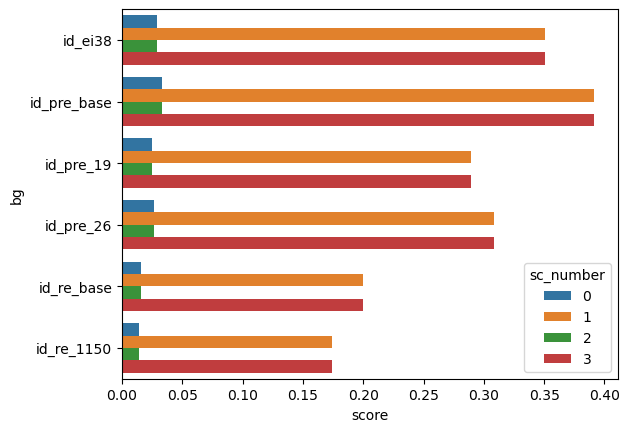

In [106]:
import seaborn as sns
# hue="time",
sns.barplot(data=results_df, x="score", y="bg", hue = "sc_number")